In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import gensim
import pyLDAvis.gensim
import logging
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import time
from pprint import pprint

In [2]:
data = pd.read_csv("./modi_data/eng_full.csv") ############
#data = data.drop(['Unnamed: 0'], axis=1)
data.head()

/Users/uni613/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,no,year,title,eng_full
0,1,2021.0,Social–Emotional Characteristics and Adjustmen...,Social–Emotional Characteristics and Adjustmen...
1,2,2021.0,Do Mass Media Shape Stereotypes About Intellec...,Do Mass Media Shape Stereotypes About Intellec...
2,3,2021.0,College Choice: Considerations for Academicall...,College Choice: Considerations for Academicall...
3,4,2021.0,Intellectual Precocity: What Have We Learned S...,Intellectual Precocity: What Have We Learned S...
4,5,2021.0,Assessing the Scholarly Reach of Terman's Work,Assessing the Scholarly Reach of Terman's Work...


In [3]:
stopword = set(stopwords.words('english'))
punc = list(string.punctuation)

/Users/uni613/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
def nltkTokenizer(raw, stopword=stopword, punc=punc):
    list = []
    skip = 0

    for word in word_tokenize(raw): #raw data
        #print(word)
        if word not in stopword and word not in punc:
            list.append(word.lower())
                
    return list

/Users/uni613/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
tokenized = data["eng_full"].apply(lambda row: nltkTokenizer(row))
#print(tokenized)
print("========= tokenization completed =========")

/Users/uni613/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
========= tokenization completed =========


In [6]:
#lda
id2word = gensim.corpora.Dictionary(tokenized)

wordlist = []
for i in range(len(id2word)):
    #print(id2word[i])
    wordlist.append(id2word[i])
#print(wordlist)
seriesWordlist = pd.Series(wordlist)

corpus=[id2word.doc2bow(text) for text in tokenized]
#print("id2word for each document : ", corpus)
print("# words in total : ", len(id2word))
print("# documents : ", len(corpus))

# words in total :  9858
# documents :  2537
/Users/uni613/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    perplexity_values = []
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=id2word,
                                                num_topics=num_topics,
                                                random_state=100,
                                                update_every=1,
                                                iterations=1000,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                eta='auto',
                                                per_word_topics=True)
        model_list.append(model)
        perplexitymodel = model.log_perplexity(corpus)
        perplexity_values.append(perplexitymodel)
        coherencemodel = CoherenceModel(model=model,
                                        texts=texts,
                                        dictionary=dictionary,
                                        coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, perplexity_values, coherence_values

/Users/uni613/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
start = time.time()
model_list, perplexity_values, coherence_values = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=tokenized,
                                                        start=2,
                                                        limit=31, #####
                                                        step=1)
print("time : ", ( time.time() - start )/60, "min")

/Users/uni613/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
time :  6.940132514635722 min


/Users/uni613/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


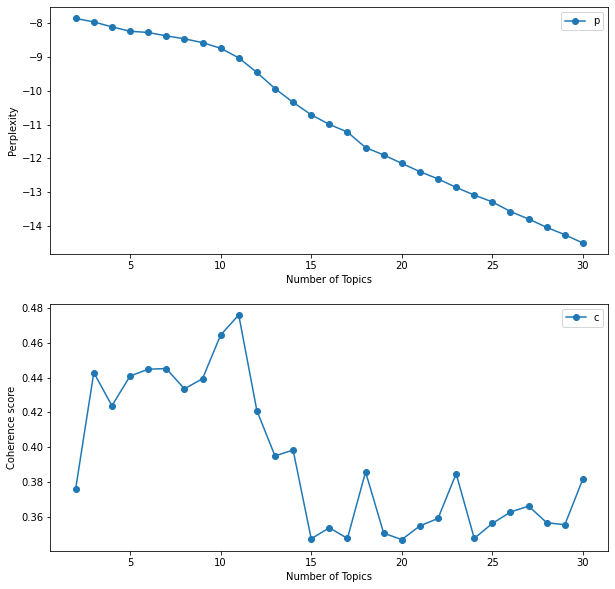

In [9]:
limit=31 ######
start=2
step=1
x = range(start, limit, step)


fig, ax = plt.subplots(2,1, figsize=(10, 10))

ax[0].plot(x, perplexity_values, marker='o')
ax[0].set_xlabel("Number of Topics")
ax[0].set_ylabel("Perplexity")
ax[0].legend(("perplexity"), loc='best')

ax[1].plot(x, coherence_values, marker='o')
ax[1].set_xlabel("Number of Topics")
ax[1].set_ylabel("Coherence score")
ax[1].legend(("coherence_values"), loc='best')
plt.show()

In [10]:
for m, pv in zip(x, perplexity_values):
  print("Num Topics =", m, " has Perplexity Value of", round(pv, 4))

for m, cv in zip(x, coherence_values):
  print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Perplexity Value of -7.8668
Num Topics = 3  has Perplexity Value of -7.9705
Num Topics = 4  has Perplexity Value of -8.1164
Num Topics = 5  has Perplexity Value of -8.2446
Num Topics = 6  has Perplexity Value of -8.2818
Num Topics = 7  has Perplexity Value of -8.3817
Num Topics = 8  has Perplexity Value of -8.4684
Num Topics = 9  has Perplexity Value of -8.5815
Num Topics = 10  has Perplexity Value of -8.7461
Num Topics = 11  has Perplexity Value of -9.0309
Num Topics = 12  has Perplexity Value of -9.4606
Num Topics = 13  has Perplexity Value of -9.9376
Num Topics = 14  has Perplexity Value of -10.345
Num Topics = 15  has Perplexity Value of -10.7106
Num Topics = 16  has Perplexity Value of -10.9953
Num Topics = 17  has Perplexity Value of -11.2222
Num Topics = 18  has Perplexity Value of -11.6791
Num Topics = 19  has Perplexity Value of -11.8981
Num Topics = 20  has Perplexity Value of -12.1468
Num Topics = 21  has Perplexity Value of -12.3913
Num Topics = 22  has 

In [11]:
a = int(input("set the number of topics "))
optimal_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=id2word,
                                                num_topics=a,
                                                random_state=100,
                                                update_every=1,
                                                iterations=1000,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                eta='auto',
                                                per_word_topics=True)
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=30))

/Users/uni613/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[(0,
  '0.053*"read" + 0.039*"at" + 0.027*"from" + 0.023*"their" + 0.019*"superior" '
  '+ 0.019*"journal" + 0.015*"i" + 0.012*"j" + 0.011*"torrance" + '
  '0.010*"self-concept" + 0.010*"average" + 0.010*"reading" + 0.010*"report" + '
  '0.010*"guide" + 0.009*"myopia" + 0.008*"books" + 0.007*"editor" + 0.007*"m" '
  '+ 0.007*"regular" + 0.006*"task" + 0.005*"e." + 0.005*"childrens" + '
  '0.005*"paul" + 0.005*"nongifted" + 0.005*"verbal" + 0.005*"sources" + '
  '0.005*"author" + 0.004*"tasks" + 0.004*"sixth" + 0.004*"genius"'),
 (1,
  '0.029*"guidance" + 0.024*"\'\'" + 0.020*"``" + 0.017*"through" + '
  '0.014*"adults" 

In [12]:
title = input("set the title of html file ")
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
pyLDAvis.save_html(vis, title+".html")

/Users/uni613/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# topic proportion
# num of optimal topics = 13

proportion = []
for i, row_list in enumerate(optimal_model[corpus]):
    #print("document number : ", i)
    row = row_list[0]
    #print(row)
    proportion.append(row)
print(pd.DataFrame(proportion))

/Users/uni613/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
                    0                 1                 2                 3   \
0      (0, 0.02998868)  (1, 0.012655632)   (5, 0.46395284)   (8, 0.01242303)   
1     (0, 0.042864136)   (5, 0.80810606)   (8, 0.01094679)  (9, 0.010697825)   
2     (0, 0.023505729)  (2, 0.018703716)  (3, 0.031364307)   (5, 0.42591035)   
3      (2, 0.03954555)   (5, 0.33022183)  (7, 0.013739216)  (8, 0.015890205)   
4     (2, 0.023322618)  (3, 0.017658986)     (5, 0.620536)  (9, 0.110298574)   
...                ...               ...               ...               ...   
2532  (0, 0.034211844)  (1, 0.017815989)  (2, 0.056776635)  (3, 0.0

In [14]:
proportion = []
for i, row_list in enumerate(optimal_model[corpus]):
    #print("document number : ", i)
    row = row_list[0]
    #print(row)
    inner_proportion = ["-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-"] # numtopics 11
    for j, (topic_num, prop) in enumerate(row):
        for k in range(11): # numtopics 11
            if topic_num == k:
                inner_proportion[k] = prop
    proportion.append(inner_proportion)
    #print(inner_proportion)

/Users/uni613/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
topic_proportions = pd.concat([data["title"], pd.DataFrame(proportion)], axis=1)
topic_proportions.columns = ["Title", "T0", "T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9", "T10"] #num topics = 11
print(topic_proportions)
topic_proportions.to_excel("./final_data/0121_topic_proportions_nltk_total.xlsx")

/Users/uni613/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
                                                  Title        T0        T1  \
0     Social–Emotional Characteristics and Adjustmen...  0.029988  0.012656   
1     Do Mass Media Shape Stereotypes About Intellec...  0.042864         -   
2     College Choice: Considerations for Academicall...  0.023506         -   
3     Intellectual Precocity: What Have We Learned S...         -         -   
4        Assessing the Scholarly Reach of Terman's Work         -         -   
...                                                 ...       ...       ...   
2532                         The Gifted Child in France  0.034212  0.01781